# **Online Shoppers Purchasing Intention**

**Data Scientist Team 6 - Majestic** :
- Faiz Naida
- Fajar Arief
- Refi Fadholi
- Riswan Setiawan
- Shanna Sinaga
- Tegar Theo

---

# **STAGE 3 - Modeling and Evaluation**

## **0. Load Dataset**
---

In [2]:
# import library yang dibutuhkan

import pandas as pd 
import numpy as np                     #untuk kalkulasi mathematic
import seaborn as sns                  #Untuk visualisasi data
import matplotlib.pyplot as plt        #Untuk plotting graphs 
from matplotlib import rcParams
%matplotlib inline
import warnings                        #Untuk mengabaikan peringatan
warnings.filterwarnings("ignore")

In [3]:
# load dataset

url = 'https://drive.google.com/file/d/1yaOIhMEWflXgfEbcBUUnYW3Y4Wdz8pYI/view?usp=share_link'
file_id = url.split('/')[-2]
dwn_url = 'https://drive.google.com/uc?id=' + file_id

#mengimpor dataset
df = pd.read_csv(dwn_url)

## **1. Feature Selection**
---

**Data yang dipilih**

In [4]:
df_selection=df[['ProductRelated', 'Duration per Page Administrative', 'Duration per Page Informational','ExitRates', 'PageValues',
                 'Revenue_True', 'VisitorType_Returning_Visitor', 'SpecialDay']]

In [5]:
df_selection.columns

Index(['ProductRelated', 'Duration per Page Administrative',
       'Duration per Page Informational', 'ExitRates', 'PageValues',
       'Revenue_True', 'VisitorType_Returning_Visitor', 'SpecialDay'],
      dtype='object')

In [8]:
# memisahkan target
X = df_selection.drop(columns='Revenue_True').copy()
                      
y = df_selection['Revenue_True'].copy()

## **2. Split Dataset**
---

In [9]:
# Split terlebih dahulu sebelum di oversampling
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [10]:
# Data Train Didapatkan oversampling dengan SMOTE
from imblearn import under_sampling, over_sampling
X_train, y_train = over_sampling.SMOTE(0.5).fit_resample(X_train, y_train)
print('SMOTE')
print(pd.Series(y_train).value_counts())

SMOTE
0    7181
1    3590
Name: Revenue_True, dtype: int64


## **3. Modeling**
---

**Function Model**

In [11]:
# Fungsi Matrix Modeling

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate

def eval_classification(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)
    
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Accuracy (Train Set): %.2f" % accuracy_score(y_train, y_pred_train))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Precision (Train Set): %.2f" % precision_score(y_train, y_pred_train))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("Recall (Train Set): %.2f" % recall_score(y_train, y_pred_train))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    print("F1-Score (Train Set): %.2f" % f1_score(y_train, y_pred_train))
    
    print("roc_auc (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("roc_auc (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))
    
    score = cross_validate(model, X_train, y_train, cv=5, scoring='roc_auc', return_train_score=True)
    print('roc_auc (crossval test): '+ str(score['test_score'].mean()))
    print('roc_auc (crossval train): '+ str(score['train_score'].mean()))

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())

**Function Confussion Matrix**

In [12]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

def c_matrix (model) :
  y_pred = model.predict(X_test)
  cf_matrix = confusion_matrix(y_test, y_pred)

  # mengatur matrix
  fig = plt.figure(figsize = (8,5))
  group_names = ['TRUE NEGATIF','FALSE POSITIF','FALSE NEGATIF','TRUE POSITIF']
  group_counts = ['{0:0.0f}'.format(value) for value in
                  cf_matrix.flatten()]
  group_percentages = ['{0:.2%}'.format(value) for value in
                      cf_matrix.flatten()/np.sum(cf_matrix)]
  labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
            zip(group_names,group_counts,group_percentages)]
  labels = np.asarray(labels).reshape(2,2)

  # display matrix
  sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='coolwarm', annot_kws={'size': 15})

### **A ) Logistic Regression**

#### **Fit Model Logistic Regression**

In [13]:
# logistic regression

from sklearn.linear_model import LogisticRegression 
logreg = LogisticRegression()
logreg.fit(X_train, y_train) 
eval_classification(logreg)

Accuracy (Test Set): 0.87
Accuracy (Train Set): 0.86
Precision (Test Set): 0.56
Precision (Train Set): 0.79
Recall (Test Set): 0.79
Recall (Train Set): 0.79
F1-Score (Test Set): 0.65
F1-Score (Train Set): 0.79
roc_auc (test-proba): 0.89
roc_auc (train-proba): 0.89
roc_auc (crossval test): 0.893338171523604
roc_auc (crossval train): 0.8937399727807179


#### **Cunfussion Matrix Logistic Regression**

Text(0.5, 1.0, 'Logistic Regression')

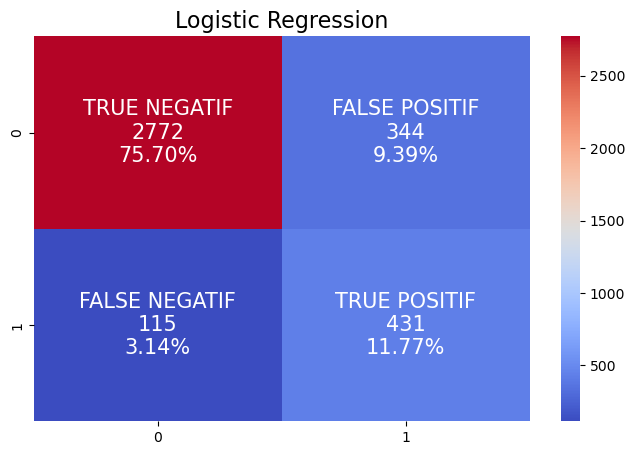

In [14]:
c_matrix(logreg)
plt.title('Logistic Regression', fontsize=16)

#### **Hyperparameter Tuning Logistic Regression**

In [15]:
# hyperparameter tuning

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

penalty = ['l1', 'l2']
C = [float(x) for x in np.linspace(0.0001, 0.05, 100)]
hyperparameters = dict(penalty=penalty, C=C)

logreg = LogisticRegression()
logreg_tuned = RandomizedSearchCV(logreg, hyperparameters, scoring='roc_auc', random_state=42, cv=5, n_iter=50)
logreg_tuned.fit(X_train, y_train)
eval_classification(logreg_tuned)


Accuracy (Test Set): 0.88
Accuracy (Train Set): 0.86
Precision (Test Set): 0.56
Precision (Train Set): 0.79
Recall (Test Set): 0.79
Recall (Train Set): 0.79
F1-Score (Test Set): 0.66
F1-Score (Train Set): 0.79
roc_auc (test-proba): 0.89
roc_auc (train-proba): 0.89
roc_auc (crossval test): 0.8927862071730253
roc_auc (crossval train): 0.893160014657769


#### **Confussion Matrix Hyperparameter Tuning Logistic Regression**

Text(0.5, 1.0, 'Logistic Regression - Tuning')

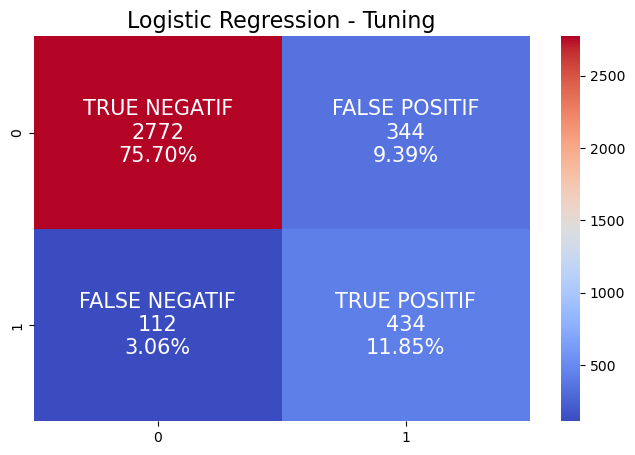

In [16]:
c_matrix(logreg_tuned)
plt.title('Logistic Regression - Tuning', fontsize=16)

#### **Learning Curve Logistic Regression**

param value: 0.0001; train: 0.8810518821138574; test: 0.8780026402779934
param value: 0.0006040404040404041; train: 0.8859195711058934; test: 0.8826730875029976
param value: 0.0011080808080808082; train: 0.8877001519407256; test: 0.8846115640884575
param value: 0.0016121212121212123; train: 0.8886154813518651; test: 0.8857818208748889
param value: 0.002116161616161616; train: 0.8892183954950758; test: 0.8866364433598066
param value: 0.0026202020202020205; train: 0.889683953981006; test: 0.8872512543083788
param value: 0.0031242424242424243; train: 0.8900588988506113; test: 0.8877332284745635
param value: 0.003628282828282828; train: 0.890354711966234; test: 0.8881840506519582
param value: 0.004132323232323233; train: 0.8906004858844856; test: 0.8885067382339525
param value: 0.004636363636363637; train: 0.890802853708273; test: 0.8888241358555864
param value: 0.0051404040404040416; train: 0.8909751592235623; test: 0.8890962749274687
param value: 0.005644444444444445; train: 0.8911404437

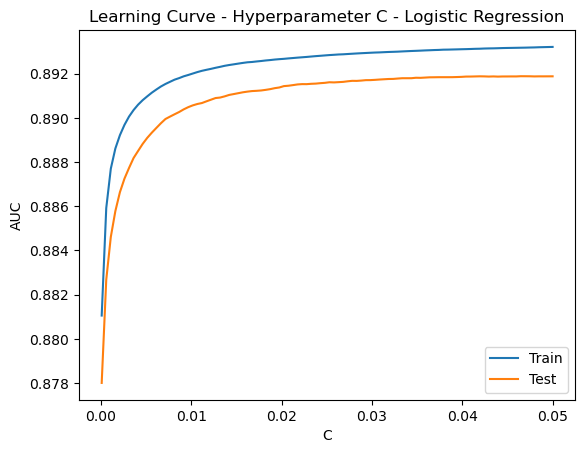

In [17]:
# learning curve
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

def draw_learning_curve(param_values):
    train_scores = []
    test_scores = []

    for c in param_values:
        model = LogisticRegression(penalty='l2', C=c)
        model.fit(X_train, y_train)

        # eval on train
        y_pred_train_proba = model.predict_proba(X_train)
        train_auc = roc_auc_score(y_train, y_pred_train_proba[:,1])
        train_scores.append(train_auc)

        # eval on test
        y_pred_proba = model.predict_proba(X_test)
        test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
        test_scores.append(test_auc)

        print('param value: ' + str(c) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('C')
    plt.ylabel('AUC')
    plt.title('Learning Curve - Hyperparameter C - Logistic Regression')
    plt.legend()
    plt.show()

param_values = [float(x) for x in np.linspace(0.0001, 0.05, 100)]
draw_learning_curve(param_values)

### **B ) KNN**

#### **Fit Model KNN**

In [18]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
eval_classification(knn)

Accuracy (Test Set): 0.86
Accuracy (Train Set): 0.91
Precision (Test Set): 0.52
Precision (Train Set): 0.84
Recall (Test Set): 0.74
Recall (Train Set): 0.91
F1-Score (Test Set): 0.61
F1-Score (Train Set): 0.87
roc_auc (test-proba): 0.86
roc_auc (train-proba): 0.97
roc_auc (crossval test): 0.9299291873996369
roc_auc (crossval train): 0.9717469948341965


#### **Confussion Matrix KNN**

Text(0.5, 1.0, 'KNN')

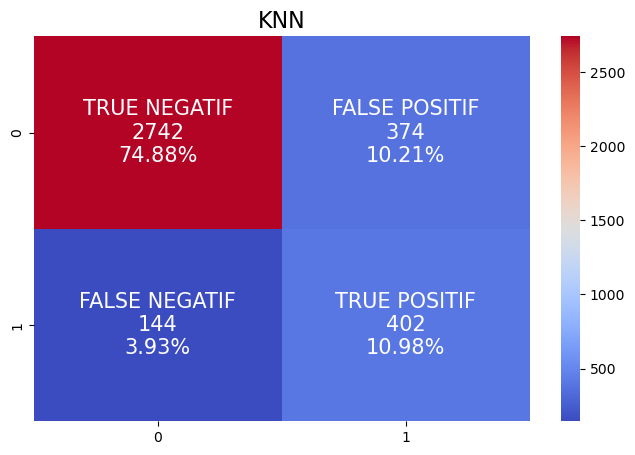

In [21]:
c_matrix(knn)
plt.title('KNN', fontsize=16)

#### **Hyperparameter Tuning KNN**

In [22]:
from sklearn.model_selection import RandomizedSearchCV

n_neighbors = list(range(1,30))
p=[1,2]
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
hyperparameters = dict(n_neighbors=n_neighbors, p=p, algorithm=algorithm)

knn.fit(X_train, y_train)
knn_tuned = RandomizedSearchCV(knn, hyperparameters, scoring='roc_auc', random_state=42, cv=5)
knn_tuned.fit(X_train, y_train)
eval_classification(knn_tuned)

Accuracy (Test Set): 0.85
Accuracy (Train Set): 0.91
Precision (Test Set): 0.51
Precision (Train Set): 0.84
Recall (Test Set): 0.71
Recall (Train Set): 0.91
F1-Score (Test Set): 0.59
F1-Score (Train Set): 0.88
roc_auc (test-proba): 0.86
roc_auc (train-proba): 0.98
roc_auc (crossval test): 0.9308312704776073
roc_auc (crossval train): 0.9656227947649187


#### **Confussion Matrix Hyperparameter Tuning KNN**

Text(0.5, 1.0, 'KNN - Tuning')

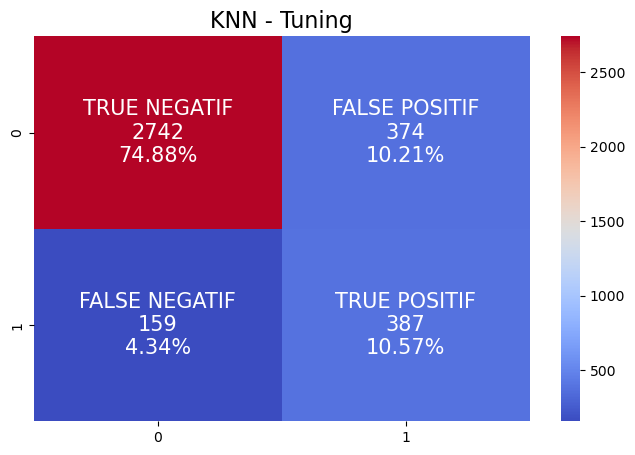

In [23]:
c_matrix(knn_tuned)
plt.title('KNN - Tuning', fontsize=16)

#### **Learning Curve KNN**

param value: 100; train: 0.9183067045930163; test: 0.9126783304414883
param value: 101; train: 0.9182665374698552; test: 0.9125695923674101
param value: 102; train: 0.918169213170472; test: 0.9126530561864323
param value: 103; train: 0.917981158884537; test: 0.912358581726361
param value: 104; train: 0.9177499312445911; test: 0.9123230214372705
param value: 105; train: 0.9175286726540441; test: 0.9123718066272624
param value: 106; train: 0.9173884077411026; test: 0.912368279987022
param value: 107; train: 0.9171901904553916; test: 0.9125393220386803
param value: 108; train: 0.9170228112796884; test: 0.9128232165780304
param value: 109; train: 0.9168261649920344; test: 0.9127650270140643
param value: 110; train: 0.9166270749296253; test: 0.9125355015117532
param value: 111; train: 0.91645954059362; test: 0.9124723158741131
param value: 112; train: 0.9162445659953009; test: 0.9127908890424936
param value: 113; train: 0.9160751115505595; test: 0.9129046231902458
param value: 114; train: 0

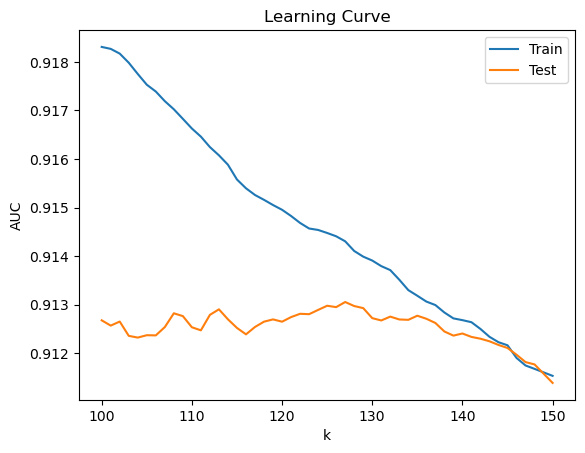

In [24]:
# Analyzing Learning Curve
import numpy as np
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

def draw_learning_curve(param_values):
    train_scores = []
    test_scores = []

    for i in param_values:
        model = KNeighborsClassifier(n_neighbors=i)
        model.fit(X_train, y_train)

        # eval on train
        y_pred_train_proba = model.predict_proba(X_train)
        train_auc = roc_auc_score(y_train, y_pred_train_proba[:,1])
        train_scores.append(train_auc)

        # eval on test
        y_pred_proba = model.predict_proba(X_test)
        test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
        test_scores.append(test_auc)

        print('param value: ' + str(i) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('k')
    plt.ylabel('AUC')
    plt.title('Learning Curve')
    plt.legend()
    plt.show()

param_values = [int(x) for x in np.linspace(100, 150, 50)]
draw_learning_curve(param_values)

### **C ) Decision Tree**

#### **Fit Model Decision Tree**

In [31]:
# Fit Model Descision tree

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
eval_classification(dt)

Accuracy (Test Set): 0.84
Accuracy (Train Set): 1.00
Precision (Test Set): 0.48
Precision (Train Set): 1.00
Recall (Test Set): 0.62
Recall (Train Set): 0.99
F1-Score (Test Set): 0.54
F1-Score (Train Set): 1.00
roc_auc (test-proba): 0.74
roc_auc (train-proba): 1.00
roc_auc (crossval test): 0.8304375644097401
roc_auc (crossval train): 0.9999494888595324


#### **Confussion Matrix**

Text(0.5, 1.0, 'Descision Tree')

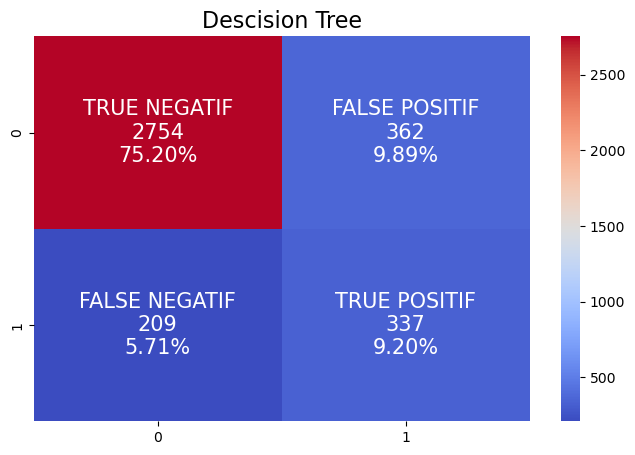

In [32]:
c_matrix(dt)
plt.title('Descision Tree', fontsize=16)

#### **Hyperparameter Tuning Decision Tree**

In [33]:
# Hyperparameter Tuning

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import uniform
import numpy as np

#list hyperparameters
max_depth = [int(x) for x in np.linspace(1, 110, num = 30)]
min_samples_split = [2,5,10,100]
min_samples_leaf = [1,2,4,10,20,50]
max_features = ['auto','sqrt']
criterion = ['gini','entropy']
splitter = ['best','random']

hyperparameters = dict(max_depth=max_depth,
                       min_samples_split=min_samples_split,
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features,
                       criterion=criterion,
                       splitter=splitter)

dt = DecisionTreeClassifier(random_state=1)
dt_tuned = GridSearchCV(dt, hyperparameters, cv=5, scoring='precision')
dt_tuned.fit(X_train, y_train)

y_pred = dt_tuned.predict(X_test)
eval_classification(dt_tuned)

Accuracy (Test Set): 0.87
Accuracy (Train Set): 0.89
Precision (Test Set): 0.57
Precision (Train Set): 0.86
Recall (Test Set): 0.67
Recall (Train Set): 0.79
F1-Score (Test Set): 0.61
F1-Score (Train Set): 0.83
roc_auc (test-proba): 0.84
roc_auc (train-proba): 0.95
roc_auc (crossval test): 0.9005856826020079
roc_auc (crossval train): 0.9515756951273044


#### **Confussion Matrix Hyperparameter Tuning**

Text(0.5, 1.0, 'Decision Tree - Tuning')

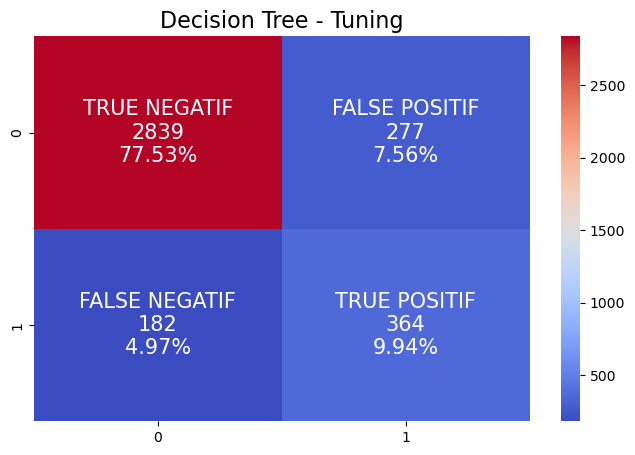

In [34]:
c_matrix(dt_tuned)
plt.title('Decision Tree - Tuning', fontsize=16)

#### **Feature Importance Decision Tree**

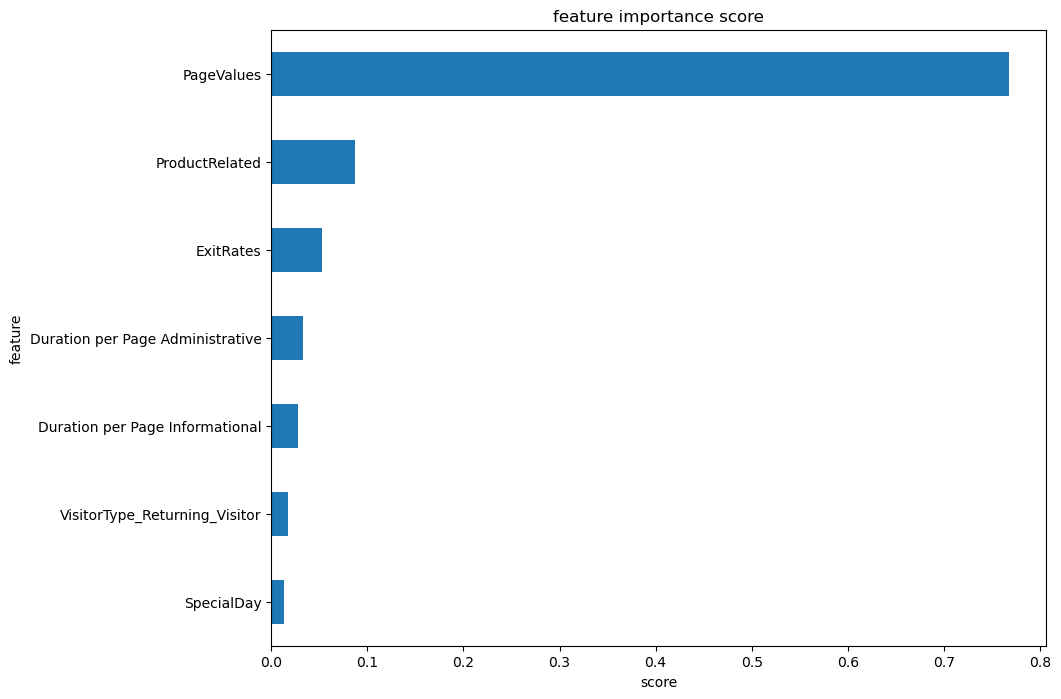

In [35]:
# feature importance
show_feature_importance(dt_tuned.best_estimator_)

### **D ) Random Forest**

#### **Fit Model Random Forest**

In [25]:
# Fit Model Random Forest

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
eval_classification(rf)

Accuracy (Test Set): 0.88
Accuracy (Train Set): 1.00
Precision (Test Set): 0.58
Precision (Train Set): 1.00
Recall (Test Set): 0.71
Recall (Train Set): 0.99
F1-Score (Test Set): 0.64
F1-Score (Train Set): 1.00
roc_auc (test-proba): 0.90
roc_auc (train-proba): 1.00
roc_auc (crossval test): 0.950589019836541
roc_auc (crossval train): 0.9991165279323997


Masih terlalu overfitting

#### **Confussion Matrix Random Forest**

Text(0.5, 1.0, 'Random Forest')

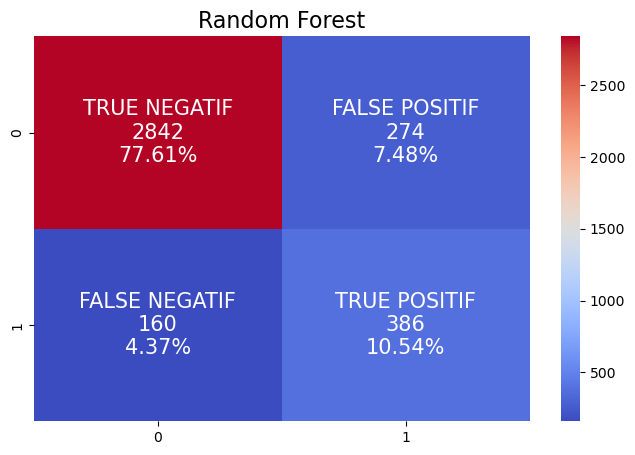

In [26]:
c_matrix(rf)
plt.title('Random Forest', fontsize=16)

#### **Hyperparamete Tuning Random Forest**

In [27]:
# tuning hyperparameter RF + oversampling
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

n_estimators = [int(x) for x in np.linspace(125, 200, 15)]
criterion = ['gini', 'entropy']
max_depth = [int(x) for x in np.arange(3, 5)]
min_samples_split = [int(x) for x in np.linspace(1000, 1200 ,20)]
min_samples_leaf = [int(x) for x in np.linspace(200, 300, 20)] # min_samples_leaf
hyperparameters = dict(n_estimators=n_estimators, criterion=criterion, max_depth=max_depth,
                       min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)

rf = RandomForestClassifier(random_state=42)
rf_tuned = RandomizedSearchCV(rf, hyperparameters, cv=5, scoring = 'roc_auc')
rf_tuned.fit(X_train, y_train)
eval_classification(rf_tuned)

Accuracy (Test Set): 0.87
Accuracy (Train Set): 0.86
Precision (Test Set): 0.54
Precision (Train Set): 0.78
Recall (Test Set): 0.79
Recall (Train Set): 0.80
F1-Score (Test Set): 0.64
F1-Score (Train Set): 0.79
roc_auc (test-proba): 0.90
roc_auc (train-proba): 0.91
roc_auc (crossval test): 0.904899775257283
roc_auc (crossval train): 0.9082363056993582


#### **Confussion Matrix Hyperparameter Tuning Random Forest**

Text(0.5, 1.0, 'Random Forest - Tuning')

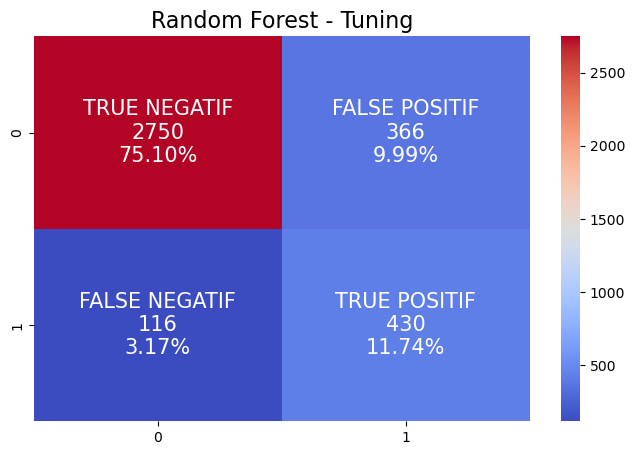

In [28]:
c_matrix(rf_tuned)
plt.title('Random Forest - Tuning', fontsize=16)

#### **Feature Importance Random Forest**

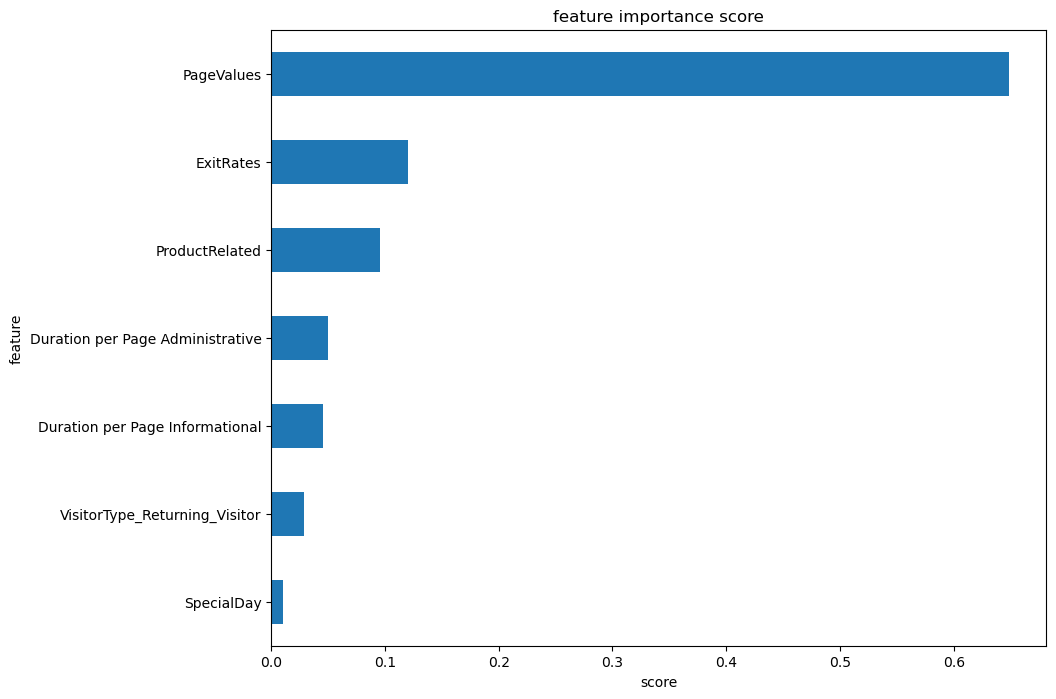

In [29]:
show_feature_importance(rf_tuned.best_estimator_)

#### **Learning Curve Random Forest**

param value: 125; train: 0.9104892049159439; test: 0.897344792563021
param value: 130; train: 0.907788135589933; test: 0.8928874131858728
param value: 135; train: 0.910456330326973; test: 0.8963496922418616
param value: 141; train: 0.9118603177139922; test: 0.8982296853766687
param value: 146; train: 0.9083033453724798; test: 0.8931927614533519
param value: 151; train: 0.9090118848912269; test: 0.894544346325476
param value: 157; train: 0.9113890376919285; test: 0.8961865851307445
param value: 162; train: 0.906174565425087; test: 0.8905277969783746
param value: 167; train: 0.9116345594746892; test: 0.8979137571884683
param value: 173; train: 0.9098968416732642; test: 0.8947406626321902
param value: 178; train: 0.9129010942292393; test: 0.8993555652734085
param value: 183; train: 0.9083889162789921; test: 0.8938490104247485
param value: 189; train: 0.9117350063751488; test: 0.8977300780092821
param value: 194; train: 0.9111072471885924; test: 0.8958256922794792
param value: 200; train: 

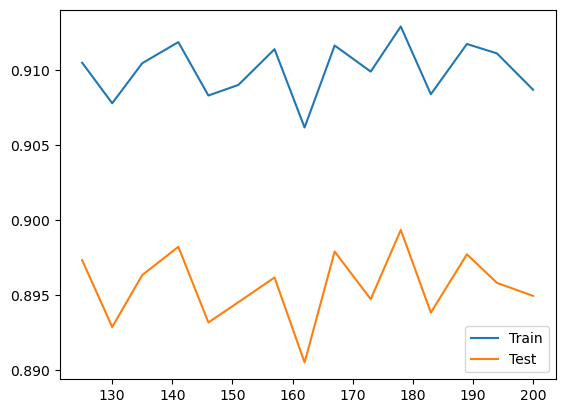

In [30]:
#learning curve
# param_values = [int(x) for x in np.linspace(1, 200, 50)] # n_estimators
# param_values = [int(x) for x in np.linspace(2, 100, 50)] # max_depth
# param_values = [int(x) for x in np.linspace(2, 20, 15)] # min_samples_split
param_values = [int(x) for x in np.linspace(125, 200, 15)] # n_estimators

train_scores = []
test_scores = []

for c in param_values:
    model = RandomForestClassifier(n_estimators = c, max_depth=3)
    model.fit(X_train, y_train)

    # eval on train
    y_pred_train_proba = model.predict_proba(X_train)
    train_auc = roc_auc_score(y_train, y_pred_train_proba[:,1])
    train_scores.append(train_auc)

    # eval on test
    y_pred_proba = model.predict_proba(X_test)
    test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
    test_scores.append(test_auc)

    print('param value: ' + str(c) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

plt.plot(param_values, train_scores, label='Train')
plt.plot(param_values, test_scores, label='Test')
plt.legend()
plt.show()

### **E ) AdaBoost**

#### **Fit Model AdaBoost**

In [36]:
# Fit Model Adabost

from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
ada.fit(X_train, y_train)
eval_classification(ada)

Accuracy (Test Set): 0.88
Accuracy (Train Set): 0.86
Precision (Test Set): 0.56
Precision (Train Set): 0.80
Recall (Test Set): 0.76
Recall (Train Set): 0.78
F1-Score (Test Set): 0.65
F1-Score (Train Set): 0.79
roc_auc (test-proba): 0.89
roc_auc (train-proba): 0.92
roc_auc (crossval test): 0.9154586587692141
roc_auc (crossval train): 0.9233441082877614


#### **Confussion Matrix AdaBoost**

Text(0.5, 1.0, 'AdaBoost')

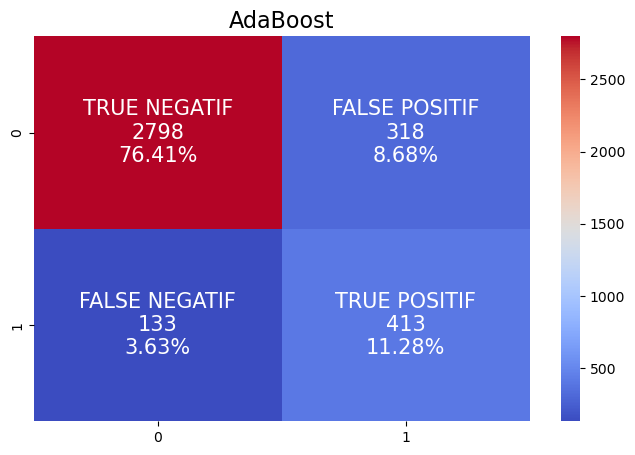

In [37]:
c_matrix(ada)
plt.title('AdaBoost', fontsize=16)

#### **Hyperparameter Tuning AdaBoost**

In [38]:
# Hyperparameter tuning

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np

# List of hyperparameter
hyperparameters = dict(n_estimators = [int(x) for x in np.linspace(start = 50, stop = 2000, num = 2000)], # Jumlah iterasi
                       learning_rate = [float(x) for x in np.linspace(start = 0.001, stop = 0.1, num = 200)],  
                       algorithm = ['SAMME', 'SAMME.R']
                      )

# Init model
ada = AdaBoostClassifier(random_state=42)
ada_tuned = RandomizedSearchCV(ada, hyperparameters, random_state=42, cv=5, scoring='recall')
ada_tuned.fit(X_train,y_train)

# Predict & Evaluation
eval_classification(ada_tuned)

Accuracy (Test Set): 0.87
Accuracy (Train Set): 0.86
Precision (Test Set): 0.54
Precision (Train Set): 0.78
Recall (Test Set): 0.81
Recall (Train Set): 0.81
F1-Score (Test Set): 0.65
F1-Score (Train Set): 0.79
roc_auc (test-proba): 0.88
roc_auc (train-proba): 0.88
roc_auc (crossval test): 0.8838702911637611
roc_auc (crossval train): 0.8879179789188564


#### **Confussion Matrix Hyperparameter Tuning AdaBoost**

Text(0.5, 1.0, 'AdaBoost - Tuning')

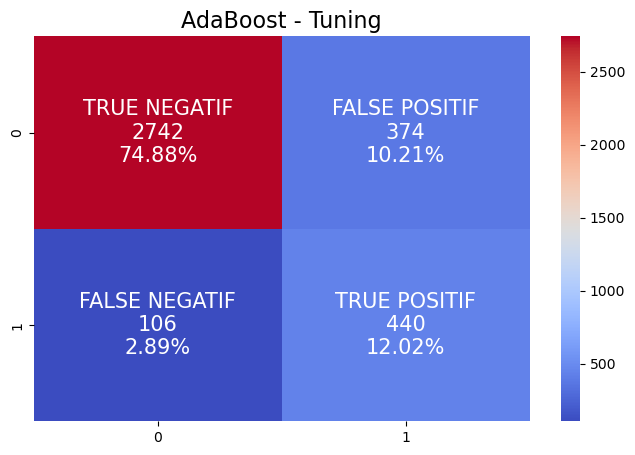

In [39]:
c_matrix(ada_tuned)
plt.title('AdaBoost - Tuning', fontsize=16)

#### **Feature Importance**

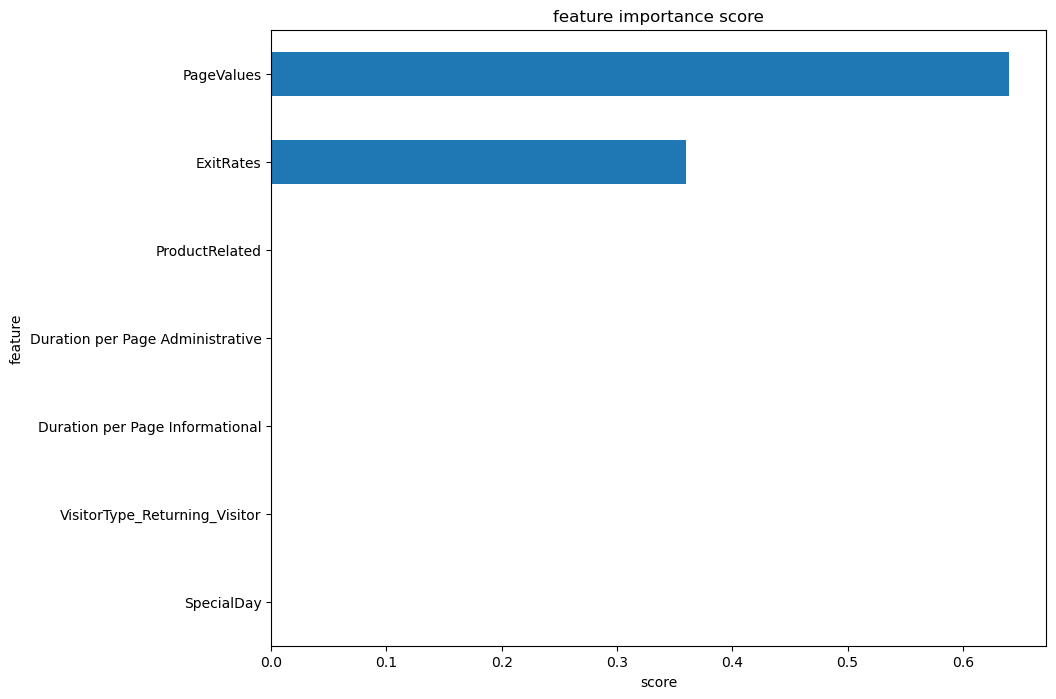

In [40]:
show_feature_importance(ada_tuned.best_estimator_)

### **F ) XgBoost**

#### **Fit Model XgBoost**

In [45]:
# Fit Model XgBoost
from xgboost import XGBClassifier

xg = XGBClassifier()
xg.fit(X_train, y_train)
eval_classification(xg)

Accuracy (Test Set): 0.88
Accuracy (Train Set): 0.96
Precision (Test Set): 0.58
Precision (Train Set): 0.95
Recall (Test Set): 0.68
Recall (Train Set): 0.91
F1-Score (Test Set): 0.63
F1-Score (Train Set): 0.93
roc_auc (test-proba): 0.90
roc_auc (train-proba): 0.99
roc_auc (crossval test): 0.9438873891435415
roc_auc (crossval train): 0.9898115197555606


#### **Confussion Matrix XgBoost**

Text(0.5, 1.0, 'XGBoost - Tuning')

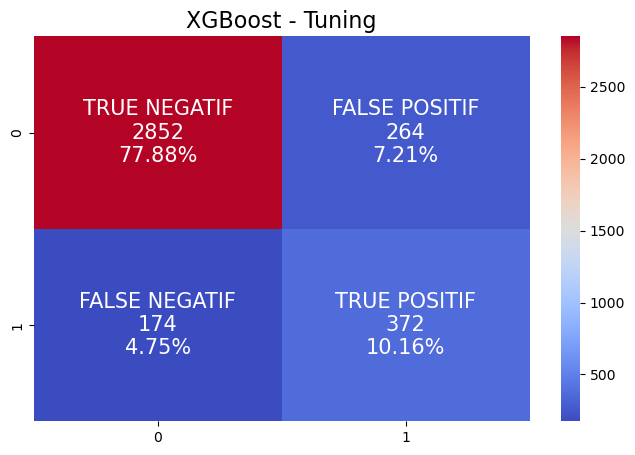

In [46]:
c_matrix(xg)
plt.title('XGBoost - Tuning', fontsize=16)

#### **Hyperparameter tuning XgBoost**

In [47]:
# Hiperparameter tuning

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np

#Menjadikan ke dalam bentuk dictionary
hyperparameters = {
                    'max_depth' : [int(x) for x in np.linspace(10, 110, num = 11)],
                    'min_child_weight' : [int(x) for x in np.linspace(1, 20, num = 11)],
                    'gamma' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'tree_method' : ['auto', 'exact', 'approx', 'hist'],

                    'colsample_bytree' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'eta' : [float(x) for x in np.linspace(0, 1, num = 100)],

                    'lambda' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'alpha' : [float(x) for x in np.linspace(0, 1, num = 11)]
                    }

# Init
from xgboost import XGBClassifier
xg = XGBClassifier(random_state=42)
xg_tuned = RandomizedSearchCV(xg, hyperparameters, cv=5, random_state=42, scoring='recall')
xg_tuned.fit(X_train,y_train)

# Predict & Evaluation
eval_classification(xg_tuned)

Accuracy (Test Set): 0.87
Accuracy (Train Set): 0.98
Precision (Test Set): 0.55
Precision (Train Set): 0.99
Recall (Test Set): 0.62
Recall (Train Set): 0.96
F1-Score (Test Set): 0.59
F1-Score (Train Set): 0.98
roc_auc (test-proba): 0.87
roc_auc (train-proba): 1.00
roc_auc (crossval test): 0.9389123120524451
roc_auc (crossval train): 0.9959975525531682


#### **Confussion Matrix Hyperparameter Tuning XgBoost**

Text(0.5, 1.0, 'XGBoost - Tuning')

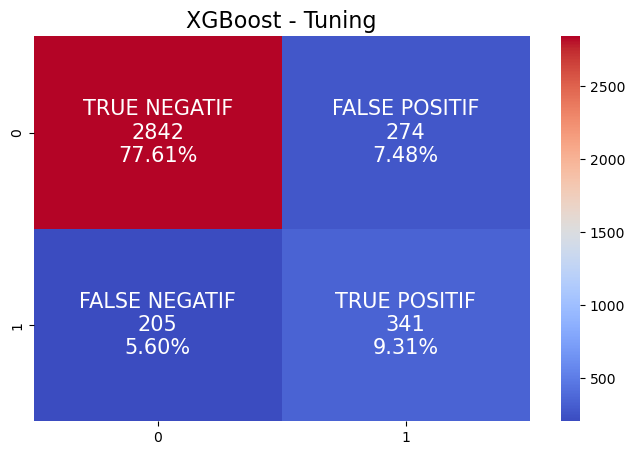

In [48]:
c_matrix(xg_tuned)
plt.title('XGBoost - Tuning', fontsize=16)

#### **Feature Importance**

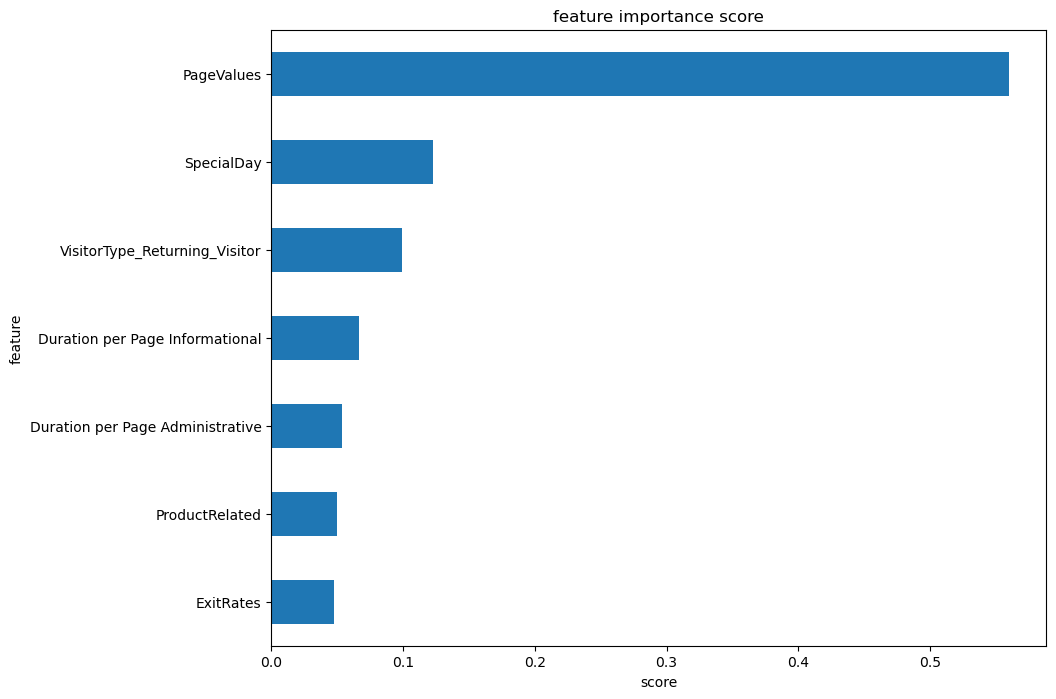

In [49]:
show_feature_importance(xg_tuned.best_estimator_)

## **3. Shap Value Model Random Forest**
---

Dari perbandingan matriks evaluasi data train test dari beberapa algiritma model yang telah dilakukan, Random Forest dengan Hyperparameter tuning dipilih sebagai model untuk diterapkan dengan **ROC AUC 0.90**. Nilai matriks ini **sudah baik** digunakan untuk memisahkan customer yang diprediksi akan melakukan pembelian atau tidak di E-commerce.

In [41]:
!pip install shap

In [59]:
import shap

model = RandomForestClassifier(n_estimators=125, max_depth=4)
model.fit(X_train, y_train)

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

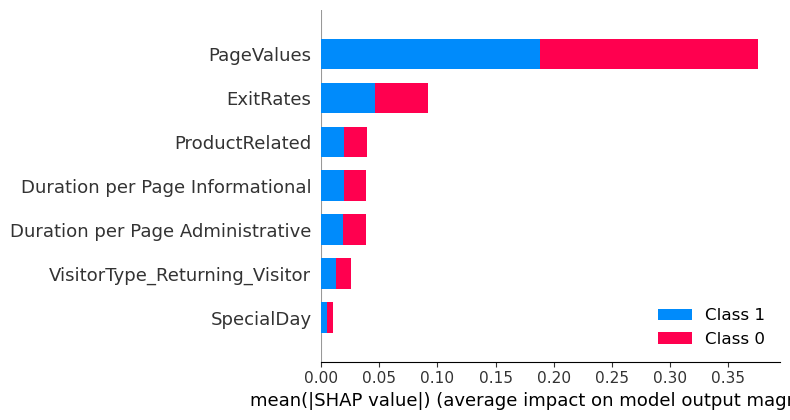

In [60]:
# bar
shap.summary_plot(shap_values, features=X_test, feature_names=X_test.columns, plot_type='bar')

Berikut ini hasil dari urutan fitur-fitur (**feature importance**) yang memiliki pengaruh paling tinggi hingga yang paling rendah pengaruhnya terhadap model prediksi. Grafik ini memperhitungkan **nilai SHAP absolut, jadi tidak masalah jika fitur mempengaruhi prediksi secara positif atau negatif**. Tiga fitur yang paling mempengaruhi adalah **PageValues, ExitRates, dan ProductRelated**.

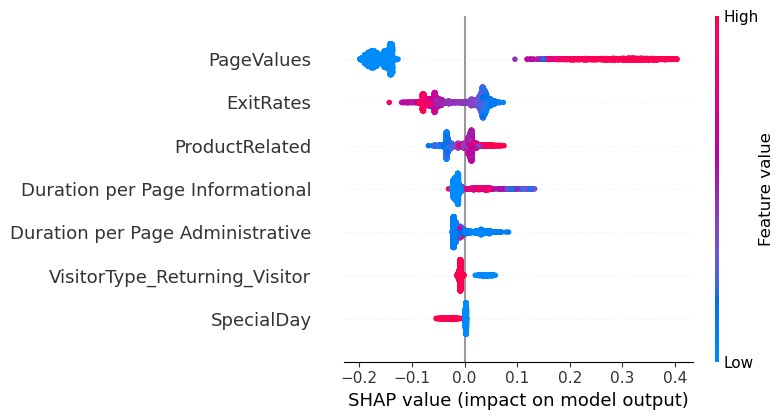

In [61]:
# beeswarm
shap.summary_plot(shap_values[1], X_test) # Summary shap value terhadap label positive

Pada grafik **beeswram** dapat diketahui bagaimana nilai yang lebih tinggi atau lebih rendah dari fitur tersebut akan mempengaruhi hasil prediksi. Untuk 3 fitur yang paling penting, **PageValues** dan **ProductRelated** yang memiliki nilai lebih tinggi akan memiliki dampak positif terhadap prediksi (**berkorelasi positif terhadap target**). Dapat diinterpretasikan bahwa, **semakin besar** nilai pada **PageValues** dan **ProductRelated** maka kecenderungan model untuk memprediksi **target positif** (pengunjung yang membeli) akan **semakin besar**. Sedangkan untuk **ExitRate**, apabila memiliki nilai yang lebih tinggi maka akan berdampak negatif pada prediksi (**berkorelasi negatif terhadap target**). Jadi **semakin kecil nilai ExitRate**-nya, maka model **memprediksi pengunjung yang membeli akan semakin besar**.